<a href="https://colab.research.google.com/github/egustavo20/dataset_datascience/blob/master/%5BPdfplumber%5D_Transformando_PDF_em_dataset_ENEM_2019_PDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#[Pdfplumber] Transformando PDF em dataset

Mostrando uma prévia aplicação da biblioteca pdfplumber com pandas no sistema python, que nos permite transformar arquivos que estejam em formato de texto em um dataset com estruturas tabular, podendo também ser exportado como (csv.) para trabalhos em outras plataformas de self-service BI ou até mesmo utilizá-lo para análises de EDA (Exploratory Data Analysis) com o próprio python.

*by [egustavo20](https://www.linkedin.com/in/elcio-gustavo-soares-de-araujo-74a22068/)*

<center><img width="75%" src="https://raw.githubusercontent.com/egustavo20/dataset_datascience/master/pdfplumber.png">



E colocando a mão na massa e exemplificando o uso da ferramenta, através do Googlecolaboratory (Colab) notebook online para uso de python, importaremos a biblioteca pdfplumber para extrair informações de um arquivo em pdf. para transformá-lo em um dataset, o arquivo utilizado foi extraído da base de dados abertos do governo sobre o ENEM 2019 e a logística por trás da organização do evento.

Nas rotinas de trabalho é normal estarmos sempre expostos em algum momento a trabalhar com a manipulação de dados, podendo ser desde uma planilha a um arquivo PDF e cada um desses arquivos pode ter sua limitação para realizar alguma edição por conta de sua estrutura. E para esses dois tipos de arquivos que comumente podem estar presentes em sua caixa de entrada no e-mail temos os formatos estruturados ou não estruturados. Definindo o conceito de cada grupo de forma resumida temos os seguintes pontos:



*   Dados estruturados: Possuem estrutura rígida e são previamente planejados, com formato bem definido e relação entre os dados, organizados em blocos semânticos. (Ex.: Banco de dados)

*   Dados não estruturados: Sem estrutura ou com estrutura mínima, consistem em cerca de mais de 80% dos dados corporativos (Textos, PDF, áudios, imagens, vídeo e redes sociais)

Porém de uma maneira simples e com aplicações básicas o python com a biblioteca pdfplumber pode trazer diversas soluções desde a edição, automatização a transformação de arquivos para diferentes formatos e extensões.





<center><img width="45%" src="https://image.freepik.com/free-vector/business-workplace-sketch-concept_1284-37246.jpg">

E colocando a mão na massa e exemplificando o uso da ferramenta, através do Googlecolaboratory (Colab) notebook online para uso de python, importaremos a biblioteca pdfplumber para extrair informações de um arquivo em pdf. para transformá-lo em um dataset, o arquivo utilizado foi extraído da base de dados abertos do governo sobre o ENEM 2019 e a logística por trás da organização do evento.


---

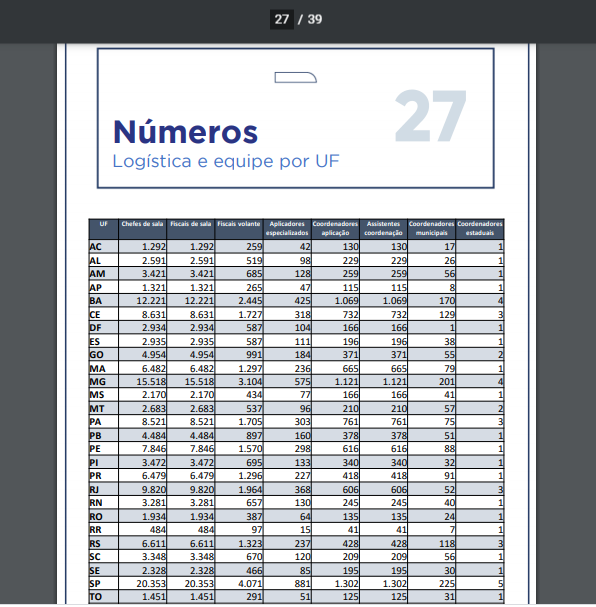

In [ ]:
#Instalando a biblioteca (pdfplumber)
!pip install pdfplumber

     |████████████████████████████████| 5.6MB 11.2MB/s 
     |████████████████████████████████| 143kB 74.5MB/s 
     |████████████████████████████████| 13.7MB 74.3MB/s 
  Created wheel for pdfplumber: filename=pdfplumber-0.5.23-cp36-none-any.whl size=29176 sha256=64d3f134128617a987ffae1e5669f98d4860632860faee7985d7496b9ffa3b74
  Stored in directory: /root/.cache/pip/wheels/f6/4d/ae/abb7b92fbed5d09a835c259f26d2a3223ea929a0ad6d322097
Successfully built pdfplumber


In [ ]:
from google.colab import drive
drive.mount ('/content/gdrive/')

In [27]:
#Importando as bibliotecas
import pdfplumber
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Mapeando o diretorio para buscar o arquivo
os.chdir('/content/gdrive/My Drive/Relatorios')

In [ ]:
#Atribuindo uma variável para o arquivo em PDF
dados=os.listdir()[0]
dados

'press_kit-enem2019.pdf'

In [ ]:
#Primeiro passo abrindo o arquivo
rel=pdfplumber.open(dados)
rel

In [ ]:
#Puxando informações da indentidade da raiz do arquivo
rel.metadata

{'Author': 'Leonardo Monteiro Oliveira',
 'CreationDate': "D:20200117102512-03'00'",
 'Creator': 'Microsoft® PowerPoint® 2016',
 'ModDate': "D:20200117102512-03'00'",
 'Producer': 'Microsoft® PowerPoint® 2016',
 'Title': 'PÁGINA 01'}

In [ ]:
#Segundo passo extraindo a página do arquivo em pdf que sera transformado
base=rel.pages[26].extract_table()
base

[['UF',
  'Chefes de sala',
  'Fiscais de sala',
  'Fiscais volante',
  'Aplicadores \nespecializados',
  'Coordenadores \naplicação',
  'Assistentes \ncoordenação',
  'Coordenadores \nmunicipais',
  'Coordenadores \nestaduais'],
 ['AC', '1.292', '1.292', '259', '42', '130', '130', '17', '1'],
 ['AL', '2.591', '2.591', '519', '98', '229', '229', '26', '1'],
 ['AM', '3.421', '3.421', '685', '128', '259', '259', '56', '1'],
 ['AP', '1.321', '1.321', '265', '47', '115', '115', '8', '1'],
 ['BA', '12.221', '12.221', '2.445', '425', '1.069', '1.069', '170', '4'],
 ['CE', '8.631', '8.631', '1.727', '318', '732', '732', '129', '3'],
 ['DF', '2.934', '2.934', '587', '104', '166', '166', '1', '1'],
 ['ES', '2.935', '2.935', '587', '111', '196', '196', '38', '1'],
 ['GO', '4.954', '4.954', '991', '184', '371', '371', '55', '2'],
 ['MA', '6.482', '6.482', '1.297', '236', '665', '665', '79', '1'],
 ['MG', '15.518', '15.518', '3.104', '575', '1.121', '1.121', '201', '4'],
 ['MS', '2.170', '2.170', 

In [ ]:
base[0][0],base[0][1]

('UF', 'Chefes de sala')

In [ ]:
#Terceiro estruturando os intervalos de dados para montagem do dataset
UF=[]
for r in range(28):
   UF.append(base[0:][r])

In [ ]:
#Plotando o dataset em formato tabular
df=pd.DataFrame(UF)
df.drop(0, axis=0, inplace=True)

In [ ]:
#Nomeando colunas
df.columns=['UF','Chefes de sala','Fiscais de sala','Fiscais volante','Aplicadores \nespecializados','Coordenadores \naplicação','Assistentes \ncoordenação','Coordenadores \nmunicipais','Coordenadores \nestaduais']

In [ ]:
df['Chefes de sala']=df['Chefes de sala'].str.replace(".","").astype('float64').astype('int64')
df['Fiscais de sala']=df['Fiscais de sala'].str.replace(".","").astype('float64').astype('int64')
df['Fiscais volante']=df['Fiscais volante'].str.replace(".","").astype('float64').astype('int64')
df['Assistentes \ncoordenação']=df['Assistentes \ncoordenação'].str.replace(".","").astype('float64').astype('int64')
df['Coordenadores \nmunicipais']=df['Coordenadores \nmunicipais'].str.replace(".","").astype('float64').astype('int64')
df['Coordenadores \nestaduais']=df['Coordenadores \nestaduais'].str.replace(".","").astype('float64').astype('int64')
df['Aplicadores \nespecializados']=df['Aplicadores \nespecializados'].str.replace(".","").astype('float64').astype('int64')
df['Coordenadores \naplicação']=df['Coordenadores \naplicação'].str.replace(".","").astype('float64').astype('int64')

In [ ]:
df.dtypes

In [26]:
#Estruturado em formato tabular podendo ser trabalhado como dataset
df.head(10)

,UF,Chefes de sala,Fiscais de sala,Fiscais volante,Aplicadores \nespecializados,Coordenadores \naplicação,Assistentes \ncoordenação,Coordenadores \nmunicipais,Coordenadores \nestaduais
1,AC,1292,1292,259,42,130,130,17,1
2,AL,2591,2591,519,98,229,229,26,1
3,AM,3421,3421,685,128,259,259,56,1
4,AP,1321,1321,265,47,115,115,8,1
5,BA,12221,12221,2445,425,1069,1069,170,4
6,CE,8631,8631,1727,318,732,732,129,3
7,DF,2934,2934,587,104,166,166,1,1
8,ES,2935,2935,587,111,196,196,38,1
9,GO,4954,4954,991,184,371,371,55,2
10,MA,6482,6482,1297,236,665,665,79,1


In [ ]:
#Atribuindo variáveis para analise (EDA)
x=df.groupby('UF')['Chefes de sala'].sum()
y=df.groupby('UF')['Fiscais de sala'].sum()
w=df.groupby('UF')['Fiscais volante'].sum()
u=df.groupby('UF')['Aplicadores \nespecializados'].sum()
p=df.groupby('UF')['Coordenadores \naplicação'].sum()
o=df.groupby('UF')['Coordenadores \nmunicipais'].sum()
b=df.groupby('UF')['Coordenadores \nestaduais'].sum()
c=df.groupby('UF')['Assistentes \ncoordenação'].sum()

In [ ]:
z=x+y+w+u+p+o+b+c

In [ ]:
#Nº de logistica para equipe de organização do ENEM 2019 por UF
z.sort_values(ascending=False).plot.bar(figsize=(12,7));

print("Total de funcionários--->",z.sort_values(ascending=False))

Total de Chefes de sala---> 147565
Total de Fiscais de sala---> 147565
Total de Fiscais volante---> 29526
Total de Aplicadores 
especializados---> 5513
Total de Coordenadores 
aplicação---> 11228
Total de Coordenadores 
municipais---> 1798
Total de Coordenadores 
estaduais---> 47
Total de Assistentes 
coordenação 
estaduais---> 11228
Total de funcionários---> 354470


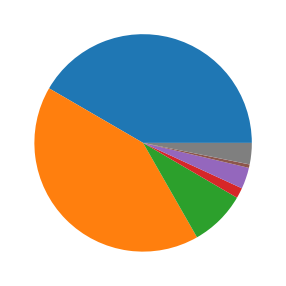

In [ ]:
#Plotando gráfico com o total de funcionarios por área para identificar qual tem maior representatividade
print("Total de Chefes de sala--->",x.sum());
print("Total de Fiscais de sala--->",y.sum());
print("Total de Fiscais volante--->",w.sum());
print("Total de Aplicadores \nespecializados--->",u.sum());
print("Total de Coordenadores \naplicação--->",p.sum());
print("Total de Coordenadores \nmunicipais--->",o.sum());
print("Total de Coordenadores \nestaduais--->",b.sum());
print("Total de Assistentes \ncoordenação \nestaduais--->",c.sum());
print("Total de funcionários--->",z.sum());

Fig, ax=plt.subplots(figsize=(15,5)) 

ed=[x.sum(),y.sum(),w.sum(),u.sum(),p.sum(),o.sum(),b.sum(),c.sum()]

ax=plt.pie(ed);



In [28]:
#Gerando arquivo do dataset em formato "csv"
df.to_csv('df.csv')